<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/Simple_linear_regression_with_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression with ANN with single neuron
https://www.tensorflow.org/tutorials/keras/regression#linear_regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#
# Create x and y values for datapoints
#

dataset_x = np.linspace(-1, 1, 100)
print(f'dataset_x.shape = {dataset_x.shape}')

# Our model will need to learn these values
SLOPE = 2
INTERCEPT = -1

rng = np.random.default_rng()
dataset_y = ((SLOPE * dataset_x) + INTERCEPT) + rng.standard_normal(*dataset_x.shape) * 0.33

dataset_x.shape = (100,)


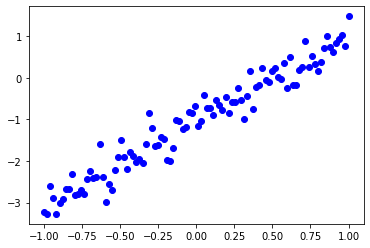

In [3]:
#
# (Optional) Plot data points
#

plt.plot(dataset_x, dataset_y, 'bo')
plt.show()

In [4]:
#
# Create a training and test datasets
#

dataset = list(zip(dataset_x, dataset_y))
print(f'dataset = {dataset}') # list of (x, y) tuples

# Pandas dataframe
df_dataset = pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, -3.2203678040443804), (-0.9797979797979798, -3.270964065880085), (-0.9595959595959596, -2.606468160221633), (-0.9393939393939394, -2.8990257408838214), (-0.9191919191919192, -3.2736946022493485), (-0.898989898989899, -3.0210086325205165), (-0.8787878787878788, -2.9217574613551314), (-0.8585858585858586, -2.6855379005301634), (-0.8383838383838383, -2.6767300959409925), (-0.8181818181818181, -2.3086140354920497), (-0.797979797979798, -2.827003137211876), (-0.7777777777777778, -2.784322906540538), (-0.7575757575757576, -2.707649308121097), (-0.7373737373737373, -2.794430869510199), (-0.7171717171717171, -2.421256295126972), (-0.696969696969697, -2.2356557388692657), (-0.6767676767676767, -2.421072654962745), (-0.6565656565656566, -2.3877881846147226), (-0.6363636363636364, -1.59571609439296), (-0.6161616161616161, -2.387077711837911), (-0.5959595959595959, -2.9817498169247636), (-0.5757575757575757, -2.563250993081532), (-0.5555555555555556, -2.694317636257977), (-0.5353

In [5]:
#
# Define function which plots 
#

# 
def plot_fn(dataset_x, dataset_y, x, y):
  plt.plot(dataset_x, dataset_y, 'bo', label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

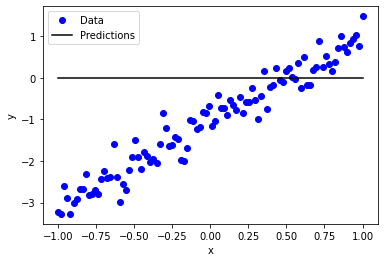

In [6]:
#
# Initialize parameters
#
k = 0
b = 0
y = 0

#
# Plot the initial hypothesis
# 
y = k * dataset_x + b
plot_fn(dataset_x, dataset_y, dataset_x, y)

Number of examples in training dataset: 80
LSE = 2.7855004499064666
LSE = 0.9465417851056801
LSE = 0.4471910431134927
LSE = 0.2528818018052135
LSE = 0.1645633043987825
LSE = 0.12250093339957946
LSE = 0.10222022473689525
LSE = 0.09241109331432781
LSE = 0.08766299656190735
LSE = 0.08536423317368091
LSE = 0.0842512451940682
LSE = 0.08371236519558359
LSE = 0.08345145262392767
LSE = 0.08332512501235845
LSE = 0.08326396019970407
LSE = 0.08323434565666055
LSE = 0.08322000700127374
LSE = 0.08321306456631423
LSE = 0.0832097032048822
LSE = 0.08320807571384416


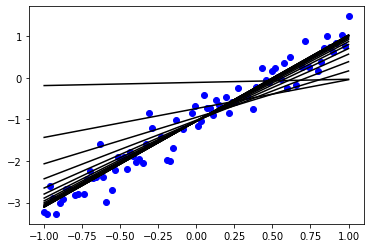

In [8]:
#
# Learn parameters (Gradient Descent algorithm)
#

learning_rate = 0.1
epochs = 200
n = dataset_train.shape[0]
print(f'Number of examples in training dataset: {n}')

# Plot training set
plt.plot(dataset_train['x'], dataset_train['y'], 'bo', label='Data')

# Gradient Descent iterations
for i in range(epochs):
    # current predicted value of y (hypothesis)
    h = k * dataset_train['x'] + b  
    dk = (1/n) * sum((h - dataset_train['y']) * dataset_train['x'])
    db = (1/n) * sum(h - dataset_train['y']) 
    k = k - learning_rate * dk 
    b = b - learning_rate * db

    if i % 10 == 0:
      y = k * dataset_x + b
      # Add to a figure a current function approximation (during learning).
      # Observe how it gets closer to the original line.
      plt.plot(dataset_x, y, color='k', label='Predictions')

      # Calculate the current error (loss).
      # Once it starts to converge, we can stop trainging (this is how number
      # of epochs is determined - empirically)
      LSE = (1/n) * sum(np.square(h - dataset_train['y']))
      print(f'LSE = {LSE}')

In [9]:
#
# Print the values of learned and original model parameters.
#

print(f'Learned slope is {k} while original is {SLOPE}')
print(f'Learned intercept is {b} while original is {INTERCEPT}')

# k and b are approximations and will not completely match SLOPE and INTERCEPT 
# from the function we used to create a dataset. Increasing epochs numbers can 
# help up to certain level of accuracy.

Learned slope is 2.0697584471920347 while original is 2
Learned intercept is -1.0387982196208752 while original is -1


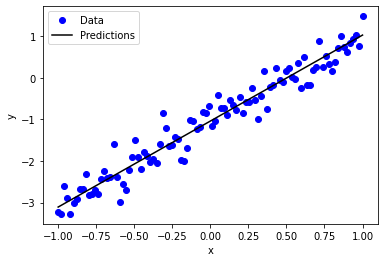

In [10]:
#
# 
# Plot the final function approximation
#

y = k * dataset_x + b
plot_fn(dataset_x, dataset_y, dataset_x, y)

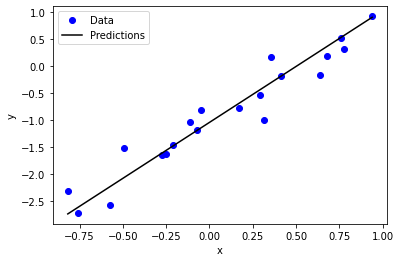

In [11]:
#
# Plot the function approximation on test (validation) set
#

test_y = k * dataset_test['x'] + b
plot_fn(dataset_test['x'], dataset_test['y'], dataset_test['x'], test_y)

In [14]:
#
# Calculate the loss on validation/test dataset. 
# If model is well trained (approximation is well fitting the ground truth), 
# it should be slighly higher to the one calculated at final training iteration.
#

n = dataset_test.shape[0]
print(f'Number of examples in test dataset: {n}')

LSE = (1/n) * sum(np.square(test_y - dataset_test['y']))
print(f'LSE = {LSE}')

Number of examples in test dataset: 20
LSE = 0.08373182816685512
